# Introduction to the Laplace Transform

The Laplace transform is a mathematical tool used to simplify the analysis of complex systems in engineering, physics, and other fields. It is particularly useful for solving differential equations with complex initial or boundary conditions.

The Laplace transform of a function `f(t)` is defined as:

$$ F(s) = \int_0^\infty e^{-st}f(t) dt $$

where `s` is a complex frequency variable.

In Python, we can use the `sympy` library to compute Laplace transforms symbolically. Here's an example implementation:

The Python script uses the following libraries:

- `sympy`: a Python library for symbolic mathematics
- `numpy`: a Python library for numerical computing
- `matplotlib`: a Python library for data visualization

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Theoretical Implementation

In [3]:
def laplace_transform(func, var, s):
    """
    Computes the Laplace transform of a given function.

    Parameters
    ----------
    func : sympy expression
        The function to transform.
    var : sympy symbol
        The independent variable of the function.
    s : sympy symbol
        The complex frequency variable.

    Returns
    -------
    sympy expression
        The Laplace transform of the given function.
    """
    return sp.integrate(func*sp.exp(-s*var), (var, 0, sp.oo))

In [12]:
# Define the function to transform
t = sp.symbols('t')
f = sp.exp(-t**2/2)

# Compute the Laplace transform of the function
s = sp.symbols('s')
F = laplace_transform(f, t, s)

# Display the function and its Laplace transform
print('Function: f(t) ='); display(f)
print('Laplace Transform: F(s) ='); display(F)

Function: f(t) =


exp(-t**2/2)

Laplace Transform: F(s) =


sqrt(2)*sqrt(pi)*exp(s**2/2)*erfc(sqrt(2)*s/2)/2

## Visualization

In [43]:
# Convert the sympy expressions to numpy functions for plotting
F_np = sp.lambdify(s, F)

# Plot the Fourier transform
freqs = np.linspace(-5, 5, 100)
F_vals = F_np(freqs)

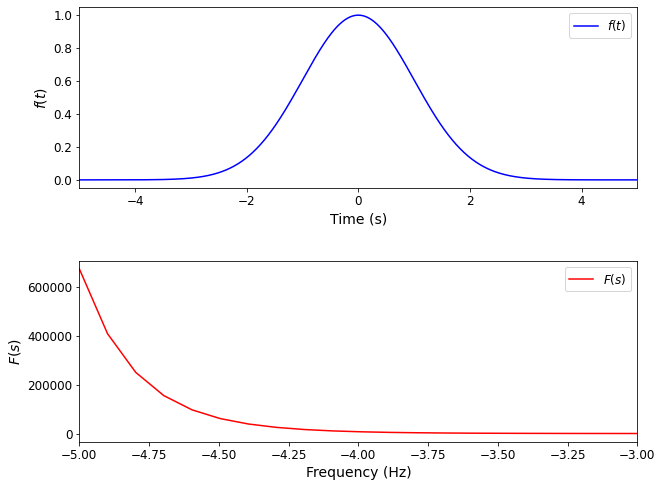

In [49]:
# Define the figure size and layout
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the function in the first subplot
t_vals = np.linspace(-5, 5, 1000)
f_vals = [f.subs(t, t_val).evalf() for t_val in t_vals]
ax1.plot(t_vals, f_vals, label='$f(t)$', color='blue')
ax1.set_xlabel('Time (s)', fontsize=14)
ax1.set_ylabel('$f(t)$', fontsize=14)
ax1.set_xlim([-5, 5])
ax1.tick_params(labelsize=12)
ax1.legend(fontsize=12)

# Plot the Laplace transform in the second subplot
ax2.plot(freqs, F_vals, label='$F(s)$', color='red')
ax2.set_xlabel('Frequency (Hz)', fontsize=14)
ax2.set_ylabel('$F(s)$', fontsize=14)
ax2.set_xlim([-5, -3])
ax2.tick_params(labelsize=12)
ax2.legend(fontsize=12)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()